# US-Ignite Fed_Notebook

# Data from 2009-2016

In [1]:
#import libraries from Carto.
from cartoframes.auth import set_default_credentials
from cartoframes.viz import Map, Layer
import cartoframes
cartoframes.__version__
#from cartoframes.viz.helpers import color_continuous_layer
import pandas as pd
import geopandas as gpd
import requests
import json
from autocensus import Query #Library from Socrata to gather ACS Data
from cartoframes.data.services import Geocoding
#import censusdata
#set_default_credentials('creds_usignite.json')
set_default_credentials(
    base_url='https://usignite-admin.carto.com/',
    api_key='81c922dc336bd82103d92a768816a4567c444909'
)

from cartoframes.data.observatory import Catalog, Variable, Geography, Dataset

In [2]:
import numpy as np

from linearmodels import PanelOLS
from linearmodels import RandomEffects
import ipywidgets as widgets
from ipywidgets import Output, Tab
from IPython.display import clear_output
from cartoframes.data.services import Isolines
from cartoframes.data.observatory import Variable
from cartoframes.data.observatory import Enrichment
from cartoframes.data.observatory import Catalog

# EDA

In [3]:
import seaborn as sns

In [4]:
df_final=pd.read_csv("~/Downloads/Final_merged.csv")

In [9]:
df_final=df_final[df_final['year']!=2010]
df_final=df_final[df_final['year']!=2011]

In [10]:
df_final['NAICS2012'].unique()

array([ 0, 51, 11, 21])

In [11]:
data=df_final[['zipcode', 'geoid', 'NAICS2012', 'year', 'edut',
       'collegemale', 'collegefemale','pop',
       'households', 'income', 'gini', 'total_p', 'ratio_65', 'Empratio',
       'estabratio']]

In [12]:
data['total_college']=data['collegemale']+data['collegefemale']
data['college_ratio']=data['total_college']/data['edut']

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
data['Empratio'][data['Empratio']!=0.0].sort_values()

1532        0.023095
1521        0.023095
1528        0.023095
1525        0.023095
2629        0.039139
2614        0.039139
2615        0.039139
2620        0.039139
2621        0.039139
2622        0.039139
2627        0.039139
2628        0.039139
2613        0.039139
18883       0.045767
18876       0.045767
1523        0.046189
1531        0.046189
1530        0.046189
1524        0.046189
2623        0.048924
2630        0.048924
2616        0.048924
2624        0.058708
2631        0.058708
2617        0.058708
15227       0.063559
15220       0.063559
13171       0.068729
13178       0.068729
13185       0.068729
            ...     
16175    2256.272862
14557    2284.260171
14550    2284.260171
14536    2284.260171
14543    2284.260171
16179    2388.360521
16186    2388.360521
16172    2388.360521
16173    2531.230845
16180    2531.230845
16187    2531.230845
17282    2804.252462
17289    2804.252462
17275    2804.252462
17268    2804.252462
16223    3285.556105
16230    3285

In [14]:
data['Empratio'].describe() 

count    13520.000000
mean        50.321752
std        218.840074
min          0.000000
25%          1.004637
50%          7.194103
75%         28.365583
max       4632.338112
Name: Empratio, dtype: float64

In [15]:
data['Empratio'].sort_values()

9463        0.000000
8739        0.000000
8740        0.000000
8741        0.000000
8742        0.000000
8745        0.000000
8746        0.000000
8747        0.000000
8748        0.000000
8749        0.000000
8752        0.000000
8753        0.000000
8754        0.000000
8755        0.000000
8756        0.000000
8759        0.000000
8760        0.000000
8761        0.000000
8738        0.000000
8762        0.000000
8735        0.000000
8733        0.000000
8689        0.000000
8690        0.000000
8691        0.000000
8692        0.000000
8693        0.000000
8696        0.000000
8697        0.000000
8698        0.000000
            ...     
16175    2256.272862
14557    2284.260171
14550    2284.260171
14543    2284.260171
14536    2284.260171
16172    2388.360521
16179    2388.360521
16186    2388.360521
16187    2531.230845
16173    2531.230845
16180    2531.230845
17289    2804.252462
17275    2804.252462
17282    2804.252462
17268    2804.252462
16230    3285.556105
16223    3285

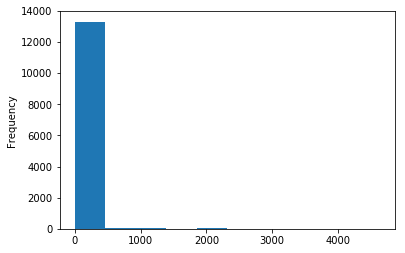

In [16]:
data['Empratio'].plot(kind ="hist")

In [17]:
data['estabratio'].describe() 

count    13520.000000
mean         1.758780
std          5.017687
min          0.000000
25%          0.055363
50%          0.391575
75%          1.357362
max         67.585764
Name: estabratio, dtype: float64

In [18]:
data['logesration']=np.log(data['estabratio'])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


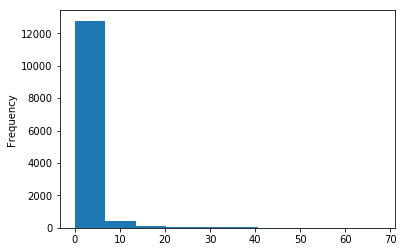

In [19]:
data['estabratio'].plot(kind ="hist")

In [20]:
loges=np.log(data['estabratio'])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [21]:
data['gini'].describe() 

count    13401.000000
mean         0.412628
std          0.059632
min          0.012800
25%          0.372800
50%          0.409000
75%          0.449300
max          0.700700
Name: gini, dtype: float64

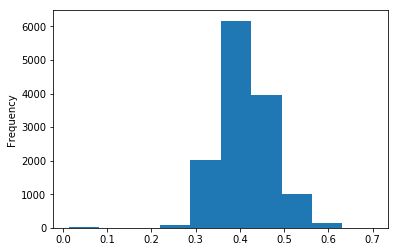

In [22]:
data['gini'].plot(kind ="hist") 

In [23]:
corr=data.corr().abs()

#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


[Text(0.5, 0, 'zipcode'),
 Text(1.5, 0, 'geoid'),
 Text(2.5, 0, 'NAICS2012'),
 Text(3.5, 0, 'year'),
 Text(4.5, 0, 'edut'),
 Text(5.5, 0, 'collegemale'),
 Text(6.5, 0, 'collegefemale'),
 Text(7.5, 0, 'pop'),
 Text(8.5, 0, 'households'),
 Text(9.5, 0, 'income'),
 Text(10.5, 0, 'gini'),
 Text(11.5, 0, 'total_p'),
 Text(12.5, 0, 'ratio_65'),
 Text(13.5, 0, 'Empratio'),
 Text(14.5, 0, 'estabratio'),
 Text(15.5, 0, 'total_college'),
 Text(16.5, 0, 'college_ratio'),
 Text(17.5, 0, 'logesration')]

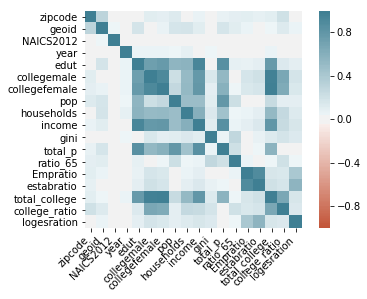

In [24]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# modeling 

In [25]:
df=data

In [26]:
df.columns

Index(['zipcode', 'geoid', 'NAICS2012', 'year', 'edut', 'collegemale',
       'collegefemale', 'pop', 'households', 'income', 'gini', 'total_p',
       'ratio_65', 'Empratio', 'estabratio', 'total_college', 'college_ratio',
       'logesration'],
      dtype='object')

In [27]:
df.head()

,zipcode,geoid,NAICS2012,year,edut,collegemale,collegefemale,pop,households,income,gini,total_p,ratio_65,Empratio,estabratio,total_college,college_ratio,logesration
2,91901,6073015502,0,2012,1790.0,124.0,107.0,291.0,113.0,904.0,0.3790,2748,0.108806,0.293542,0.029354,231.0,0.129050,-3.528319
3,91901,6073015502,0,2013,1900.0,141.0,148.0,365.0,136.0,903.0,0.3782,2748,0.108806,0.176125,0.017613,289.0,0.152105,-4.039145
4,91901,6073015502,0,2014,1865.0,143.0,135.0,411.0,154.0,883.0,0.3837,2748,0.108806,0.234834,0.023483,278.0,0.149062,-3.751463
5,91901,6073015502,0,2015,2005.0,126.0,152.0,454.0,170.0,949.0,0.3917,2748,0.108806,0.645793,0.017613,278.0,0.138653,-4.039145
6,91901,6073015502,0,2016,2017.0,108.0,151.0,499.0,189.0,950.0,0.4479,2748,0.108806,0.704501,0.023483,259.0,0.128409,-3.751463


In [28]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

In [29]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
df['year']=df['year'].dt.year

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
#add column year to index
df=df.set_index([ 'zipcode','year'])
#swap indexes




In [32]:
import statsmodels.formula.api as smf

In [33]:
df.columns

Index(['geoid', 'NAICS2012', 'edut', 'collegemale', 'collegefemale', 'pop',
       'households', 'income', 'gini', 'total_p', 'ratio_65', 'Empratio',
       'estabratio', 'total_college', 'college_ratio', 'logesration'],
      dtype='object')

In [34]:
FE_ols1 = smf.ols(formula= 'estabratio ~ 1 +pop+households+income+ratio_65+edut+total_college', data = df).fit()
print(FE_ols1.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     134.4
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          5.51e-166
Time:                        14:34:41   Log-Likelihood:                -40457.
No. Observations:               13465   AIC:                         8.093e+04
Df Residuals:                   13458   BIC:                         8.098e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3644      0.170      8.028

In [35]:
FE_ols2 = smf.ols(formula= 'estabratio ~ 1 +pop+households+income+ratio_65+edut+college_ratio', data = df).fit()
print(FE_ols2.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     127.5
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          1.69e-157
Time:                        14:34:41   Log-Likelihood:                -40420.
No. Observations:               13443   AIC:                         8.085e+04
Df Residuals:                   13436   BIC:                         8.091e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0786      0.174      0.451

In [36]:
FE_ols3 = smf.ols(formula= 'estabratio ~ 1 +pop+households+income+ratio_65+edut', data = df).fit()
print(FE_ols3.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     114.4
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          8.65e-119
Time:                        14:34:42   Log-Likelihood:                -40568.
No. Observations:               13465   AIC:                         8.115e+04
Df Residuals:                   13459   BIC:                         8.119e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7767      0.167      4.658      0.0

In [37]:
FE_olsfinal = smf.ols(formula= 'estabratio ~ 1 +pop+income+ratio_65+edut', data = df).fit()
print(FE_olsfinal.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     134.0
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          1.89e-112
Time:                        14:34:42   Log-Likelihood:                -40586.
No. Observations:               13465   AIC:                         8.118e+04
Df Residuals:                   13460   BIC:                         8.122e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3603      0.134     10.148      0.0

In [38]:
import numpy as np
import pandas as pd
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [39]:
df.columns

Index(['geoid', 'NAICS2012', 'edut', 'collegemale', 'collegefemale', 'pop',
       'households', 'income', 'gini', 'total_p', 'ratio_65', 'Empratio',
       'estabratio', 'total_college', 'college_ratio', 'logesration'],
      dtype='object')

In [40]:

year = pd.to_datetime(data['year'], format='%Y')

In [41]:

year = pd.Categorical(year)

In [42]:
df['year'] = year

In [43]:
df['year']=df['year'].apply(lambda x: x.strftime('%Y') )

In [44]:
df.dropna(inplace=True)

In [45]:

exog_vars = ['pop','income','ratio_65','edut','year']
exog = sm.add_constant(df[exog_vars])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [46]:
df.isnull().values.any()
df.isnull().sum()

geoid            0
NAICS2012        0
edut             0
collegemale      0
collegefemale    0
pop              0
households       0
income           0
gini             0
total_p          0
ratio_65         0
Empratio         0
estabratio       0
total_college    0
college_ratio    0
logesration      0
year             0
dtype: int64

In [47]:
from linearmodels.panel import RandomEffects
mod = RandomEffects(df.estabratio , exog)


In [48]:
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:             estabratio   R-squared:                        0.0362
Estimator:              RandomEffects   R-squared (Between):              0.0011
No. Observations:               13380   R-squared (Within):               0.0360
Date:                Thu, Feb 27 2020   R-squared (Overall):              0.0319
Time:                        14:34:44   Log-likelihood                -3.826e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      62.834
Entities:                          85   P-value                           0.0000
Avg Obs:                       157.41   Distribution:                 F(8,13371)
Min Obs:                       5.0000                                           
Max Obs:                       360.00   F-statistic (robust):             62.056
                            

In [49]:

exog_vars1 = ['pop','income','ratio_65','edut']
exog1 = sm.add_constant(df[exog_vars1])

In [50]:
FE_olsfinal = smf.ols(formula= 'estabratio ~ 1 +pop+income+ratio_65+edut', data = df).fit()
print(FE_olsfinal.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     133.0
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          1.37e-111
Time:                        14:34:44   Log-Likelihood:                -40368.
No. Observations:               13380   AIC:                         8.075e+04
Df Residuals:                   13375   BIC:                         8.078e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4274      0.139     10.233      0.0

In [51]:
mod2 = PanelOLS(df.estabratio, exog1, entity_effects=True, time_effects=True)
fe_te_res = mod2.fit()
print(fe_te_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             estabratio   R-squared:                        0.0358
Estimator:                   PanelOLS   R-squared (Between):             -0.0086
No. Observations:               13380   R-squared (Within):               0.0356
Date:                Thu, Feb 27 2020   R-squared (Overall):              0.0370
Time:                        14:34:44   Log-likelihood                -3.822e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      123.26
Entities:                          85   P-value                           0.0000
Avg Obs:                       157.41   Distribution:                 F(4,13287)
Min Obs:                       5.0000                                           
Max Obs:                       360.00   F-statistic (robust):             123.26
                            

In [52]:
from linearmodels.panel import compare
print(compare({'RE':re_res,'Pooled':fe_te_res}))

                    Model Comparison                    
                                       RE         Pooled
--------------------------------------------------------
Dep. Variable                  estabratio     estabratio
Estimator                   RandomEffects       PanelOLS
No. Observations                    13380          13380
Cov. Est.                      Unadjusted     Unadjusted
R-squared                          0.0362         0.0358
R-Squared (Within)                 0.0360         0.0356
R-Squared (Between)                0.0011        -0.0086
R-Squared (Overall)                0.0319         0.0370
F-statistic                        62.834         123.26
P-value (F-stat)                   0.0000         0.0000
=====================     ===============   ============
const                              1.8003         1.5131
                                 (3.9087)       (10.738)
pop                               -0.0033        -0.0033
                               